In [1]:
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import History
history = History()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Data Acquisition

In [2]:
# Data Acuisition
x_train=pd.read_csv("mnist_train.csv")
x_test=pd.read_csv("mnist_test.csv")

In [3]:
# Data Visulization
x_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Data Preprocessing

y_train = x_train.iloc[:,0].values
x_train = x_train.drop(["label"],axis=1)
y_test = x_test.iloc[:,0].values
x_test = x_test.drop(["label"],axis=1)

In [5]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [7]:
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
print(f'x_val shape = {x_val.shape}')

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_val shape = (12000, 28, 28, 1)


# Model

In [8]:
autoencoder = Sequential()
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

autoencoder.add(MaxPooling2D((2, 2), padding='same'))
 
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [9]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

# Fit Data

In [10]:
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size = 256, shuffle = True,
              validation_data = (x_val,x_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.0470 - accuracy: 0.7988 - val_loss: 0.0304 - val_accuracy: 0.8045
Epoch 2/100
48000/48000 [==============================] - 116s 2ms/sample - loss: 0.0265 - accuracy: 0.8052 - val_loss: 0.0237 - val_accuracy: 0.8060
Epoch 3/100
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.0223 - accuracy: 0.8077 - val_loss: 0.0208 - val_accuracy: 0.8085
Epoch 4/100
48000/48000 [==============================] - 99s 2ms/sample - loss: 0.0200 - accuracy: 0.8089 - val_loss: 0.0191 - val_accuracy: 0.8093
Epoch 5/100
48000/48000 [==============================] - 99s 2ms/sample - loss: 0.0186 - accuracy: 0.8096 - val_loss: 0.0179 - val_accuracy: 0.8091
Epoch 6/100
48000/48000 [==============================] - 103s 2ms/sample - loss: 0.0175 - accuracy: 0.8101 - val_loss: 0.0170 - val_accuracy: 0.8101
Epoch 7/100
48000/48000 [=====================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


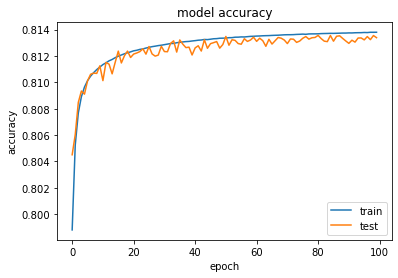

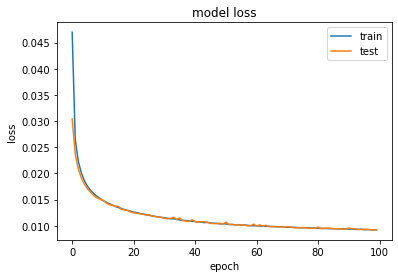

In [11]:
# Plot training loss and validation split loss over the epochs

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('Convae_model_accuracy.png')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('Convae_model_loss.png')
plt.show()

In [13]:
reconstructed_imgs = autoencoder.predict(x_test)

In [14]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation[0])
print("Accuracy",evaluation[1]*100)

10000/10000 [==============================] - 5s 464us/sample - loss: 0.0090 - accuracy: 0.8128
Loss: 0.0089715894959867
Accuracy 81.28114938735962


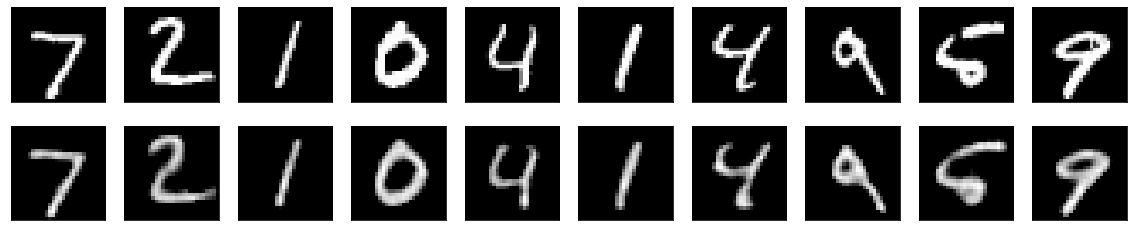

In [16]:
# Ploting the original input vs reconstructed output
n = 10
plt.figure(figsize =(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('Convae_model_output.png')
plt.show()